# MDM imaging analysis

In [1]:
# load modules
from scipy.stats import stats
import scipy.io as spio
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from nilearn.input_data import NiftiMasker
import nilearn.plotting as plotting
from nilearn.image import mean_img
# import pickle
import pandas as pd
import seaborn as sns 

import nipype.pipeline.engine as pe
from nipype.interfaces import spm
from nipype.interfaces import fsl


%matplotlib inline 
%autosave 5
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})

/gpfs/ysm/project/rj299/conda_envs/py37_dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


191119-10:47:40,388 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.3.1)


Autosaving every 5 seconds


In [2]:
from nipype.interfaces.matlab import MatlabCommand
MatlabCommand.set_default_paths('/home/rj299/project/MATLAB/toolbox/spm12/') # set default SPM12 path in my computer. 

In [3]:
base_root = '/home/rj299/scratch60/mdm_analysis/'
data_root = '/home/rj299/scratch60/mdm_analysis/data_rename'
out_root = '/home/rj299/scratch60/mdm_analysis/output'

# data_root = 'D:\Ruonan\Projects in the lab\MDM Project\Medical Decision Making Imaging\MDM_imaging\Imaging Analysis\data_rename'
# out_root = 'D:\Ruonan\Projects in the lab\MDM Project\Medical Decision Making Imaging\MDM_imaging\Imaging Analysis\output'

In [4]:
# get all subjects folder
sub_fold = glob.glob(data_root + '/sub-*')
# sub_fold = glob.glob(data_root + '\\sub-*')

# get all subject id
# sub_num = [] 
# for fold in sub_fold:
#     sub_id = fold.split('sub-')[1]
#     sub_num.append(int(sub_id))


# Subjects included in analysis
sub_num = [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 
           2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 
           2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 
           2664, 2665, 2666]

sub_num.sort()
print('All subjects included in analysis:', sub_num)
print(len(sub_num), 'subjects')

All subjects included in analysis: [2073, 2550, 2582, 2583, 2584, 2585, 2588, 2592, 2593, 2594, 2596, 2597, 2598, 2599, 2600, 2624, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666]
33 subjects


## Load anatomical data

In [5]:
anat_mean = nib.load(os.path.join(out_root, 'imaging', 'all_sub_average.nii.gz'))

In [8]:
def load_anat(sub):
    """ Load single subject anatomical data
    
    Parameters:
    ----------
    sub: subject id
    
    Retrun:
    ----------
    
    """
    
    anat_in = os.path.join(data_root, 'sub-%s' %sub, 'anat', 'sub-%s_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz' %sub)
    anat = nib.load(anat_in)
    
    return anat

In [17]:
# load all subjects' anatomical data
anat = []
for sub in sub_num:
    anat.append(load_anat(sub))

# average
anat_mean = mean_img(anat)

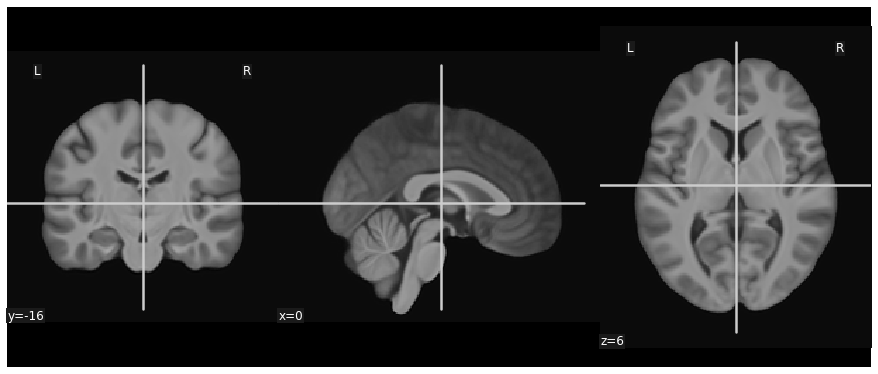

In [9]:
fig = plt.figure(figsize = (12,5))
plotting.plot_anat(anat_mean, black_bg = True, figure = fig)

In [20]:
# save the mean anatomical image
# anat_mean.to_filename(os.path.join(out_root, 'all_sub_average.nii.gz'))

3


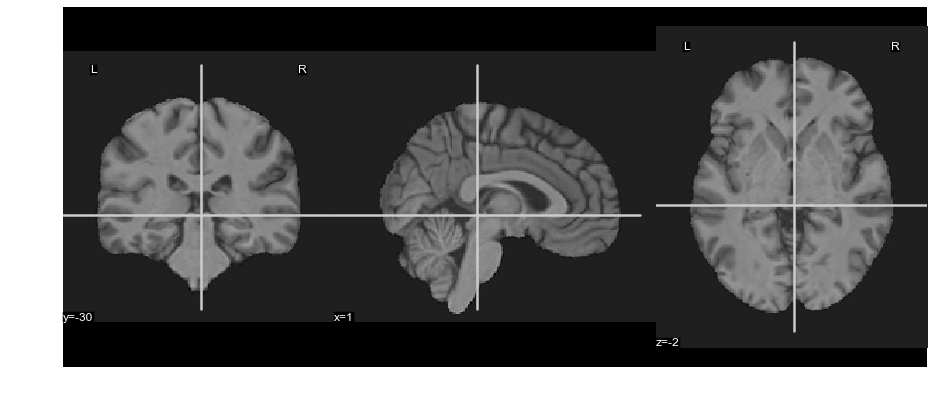

In [51]:
print(len(anat))

# single subject anatomical plot
fig = plt.figure(figsize = (12,5))
plotting.plot_anat(anat[0], black_bg = True, figure = fig)

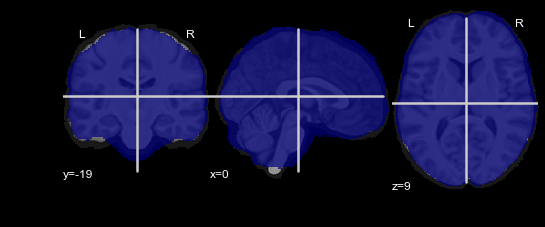

In [54]:
mask_whb = load_whb_mask(2073,2)
plotting.plot_roi(mask_whb, bg_img = anat_mean)

## Look at SPM level1 analysis output

In [23]:
# con1 = nib.load(os.path.join(out_root, 'imaging', 'Sink', '1stLevel', '_subject_id_2588_task_id_2','con_0001.nii'))
# con2 = nib.load(os.path.join(out_root, 'imaging', 'Sink', '1stLevel', '_subject_id_2588_task_id_2','con_0002.nii'))

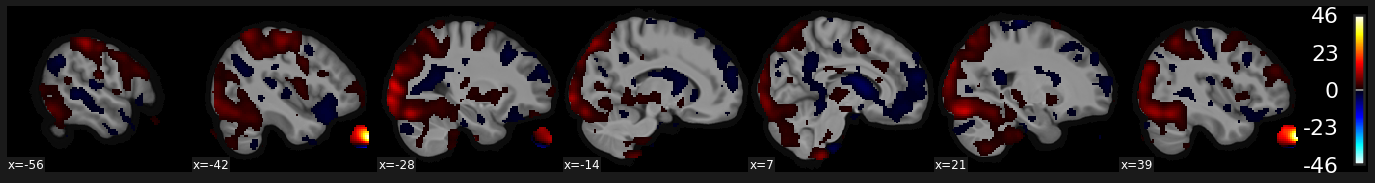

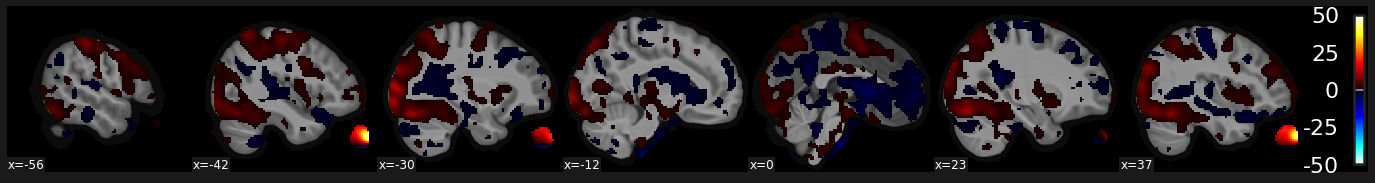

In [7]:
# plot Medical ambiguity and risk
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0001.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0002.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')

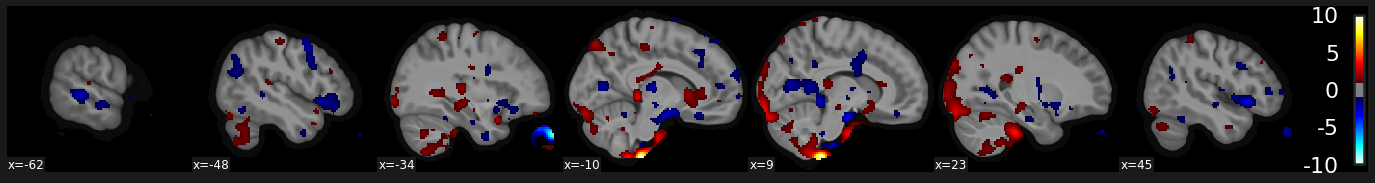

In [8]:
# plot Medical ambiguity > risk
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0003.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')


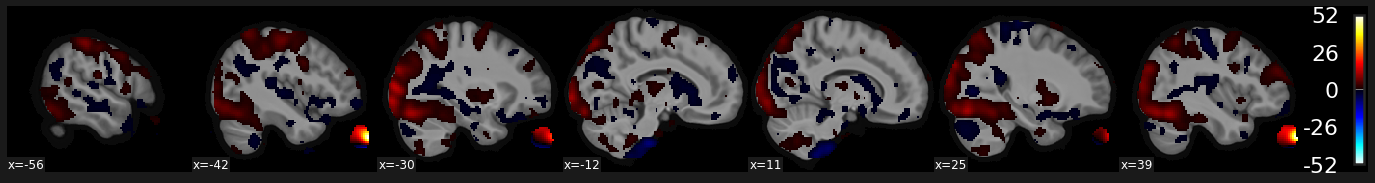

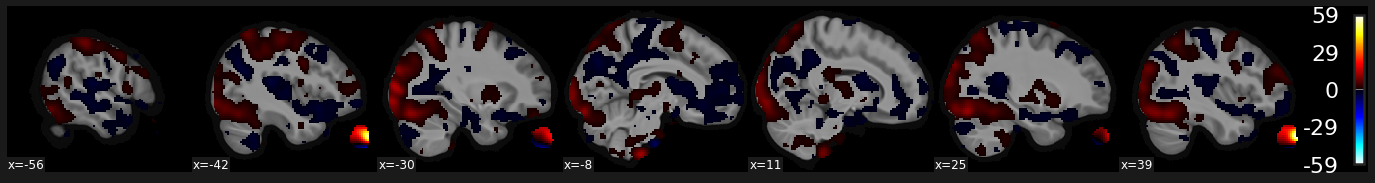

In [9]:
# plot Monetary ambiguity and risk
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0004.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0005.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')

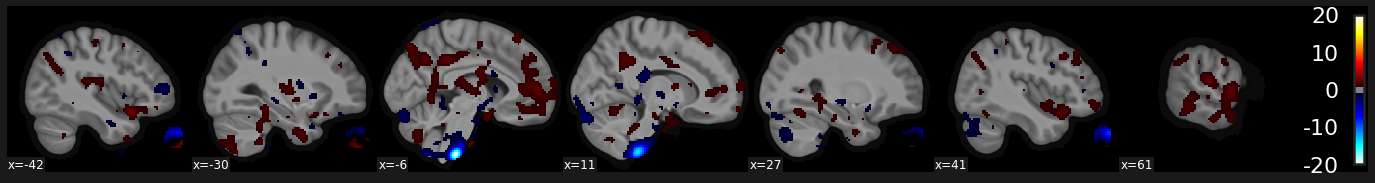

In [10]:
# plot Monetary ambiguity > risk
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0006.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')


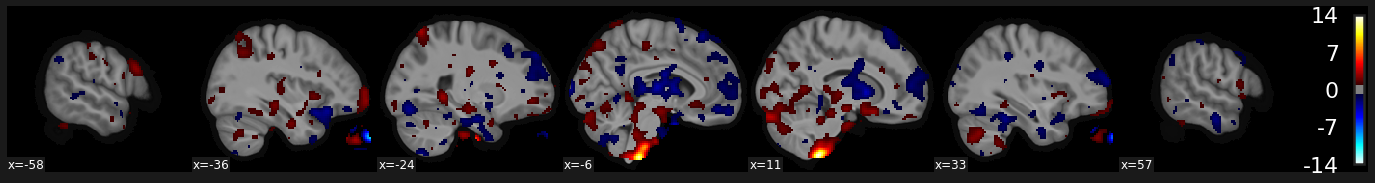

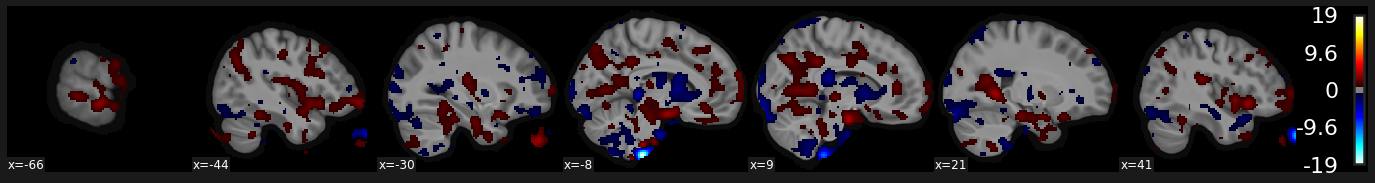

In [11]:
# plot Medical > Monetary, ambiguity
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0007.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')
# plot Medical > Monetary, risk
plotting.plot_stat_map('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0008.nii', threshold = 1, bg_img = anat_mean, display_mode = 'x')


In [12]:
# load Medical > Monetary, ambiguity + risk
con7 = nib.load('/home/rj299/project/mdm_analysis/output/imaging/Sink/1stLevel/_subject_id_2073/con_0009.nii')


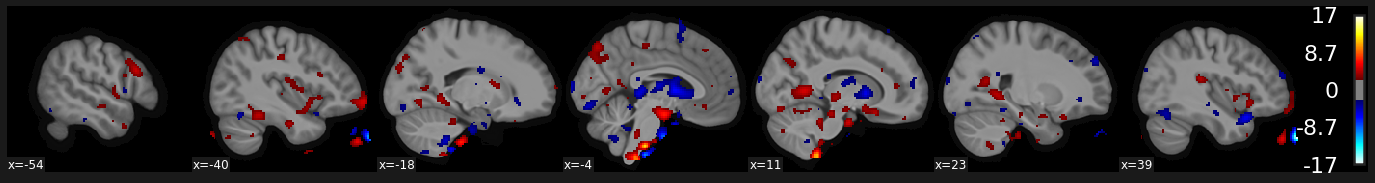

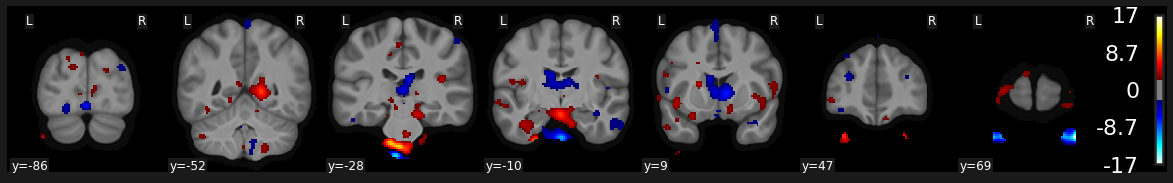

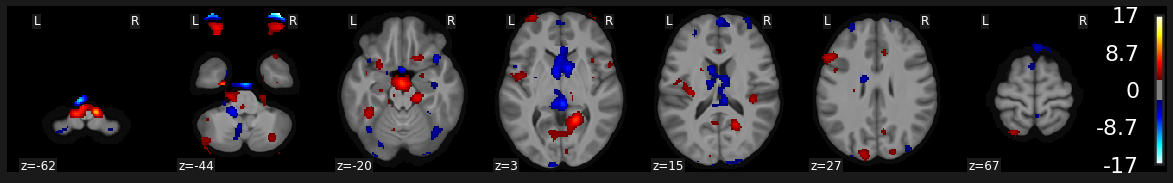

In [13]:
# plot Medical > Monetary, ambiguity + risk
plotting.plot_stat_map(con7, threshold = 2.5, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(con7, threshold = 2.5, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(con7, threshold = 2.5, bg_img = anat_mean, display_mode = 'z')


In [66]:
spmt1 = nib.load(os.path.join(out_root, 'Sink', '1stLevel', '_subject_id_2588_task_id_1','spmT_0001.nii'))
spmt2 = nib.load(os.path.join(out_root, 'Sink', '1stLevel', '_subject_id_2588_task_id_1','spmT_0002.nii'))

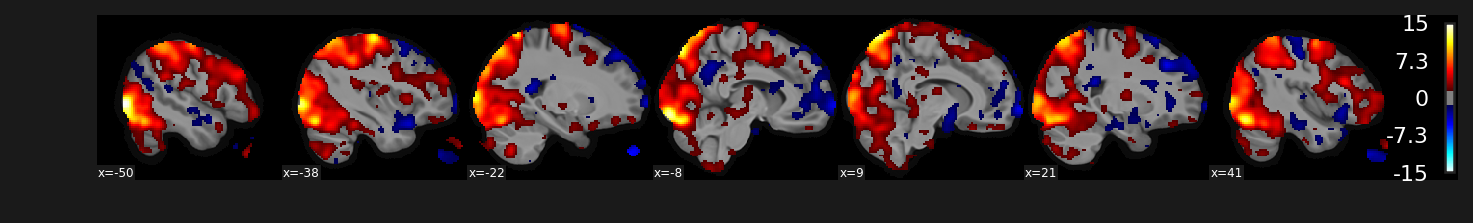

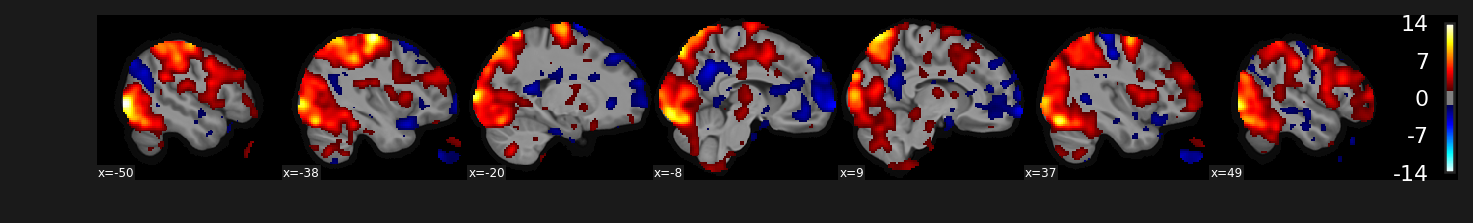

In [26]:
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink', '1stLevel', '_subject_id_2588_task_id_2','spmT_0001.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink', '1stLevel', '_subject_id_2588_task_id_2','spmT_0002.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')

In [68]:
# plot residule
resid = nib.load('/home/rj299/project/mdm_analysis/work/l1spm/_subject_id_2588_task_id_1/level1estimate/ResMS.nii')

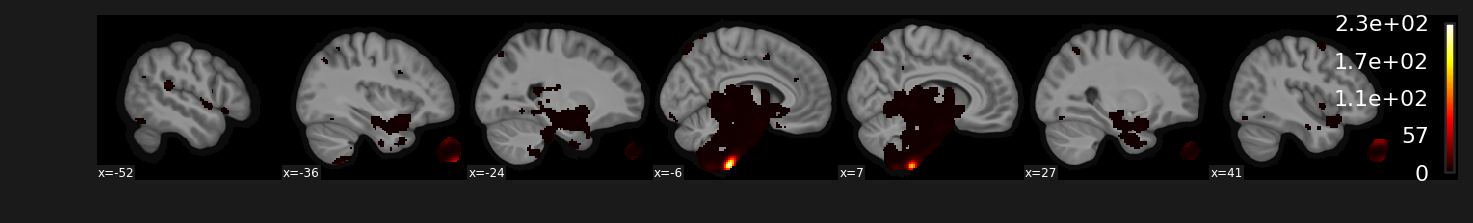

In [72]:
plotting.plot_stat_map(resid, threshold = 2, bg_img = anat_mean, display_mode = 'x')

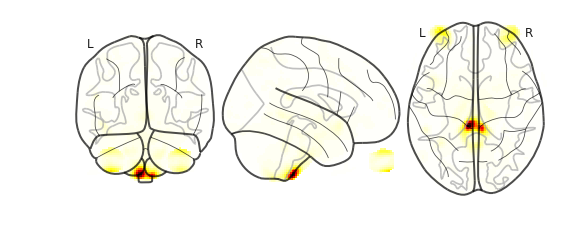

In [73]:
plotting.plot_glass_brain(resid)

In [74]:
con1.affine

array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [ ]:
long_epi = nib.load('/home/rj299/project/mdm_analysis/data_rename/sub-2588/ses-1/func/sub-2588_ses-1_task-2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

(97, 115, 97, 315)


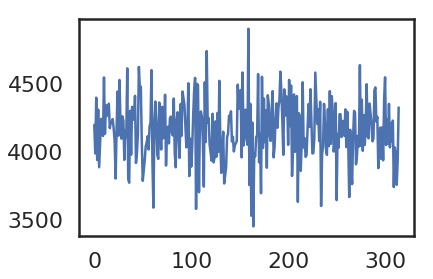

In [27]:
vox1 = long_epi.get_data()
print(vox1.shape)
plt.plot(vox1[50,50,50,])

In [ ]:
short_epi = nib.load('/home/rj299/project/mdm_analysis/work/l1spm/_subject_id_2588_task_id_2/extract/sub-2588_ses-1_task-2_space-MNI152NLin2009cAsym_desc-preproc_bold_roi.nii')

(97, 115, 97, 305)


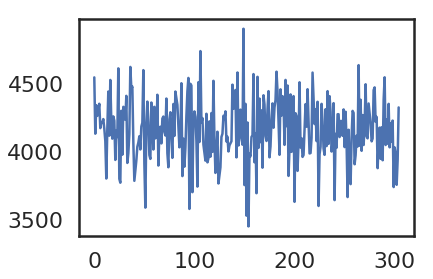

In [28]:
# load the extracted timecourse, and check length
vox1 = short_epi.get_data()
print(vox1.shape)
plt.plot(vox1[50,50,50,])

### Load the SV GLM model

In [ ]:
spmt1 = nib.load(os.path.join(out_root, 'Sink', '1stLevel', '_subject_id_2588_task_id_1','spmT_0001.nii'))
spmt2 = nib.load(os.path.join(out_root, 'Sink', '1stLevel', '_subject_id_2588_task_id_1','spmT_0002.nii'))

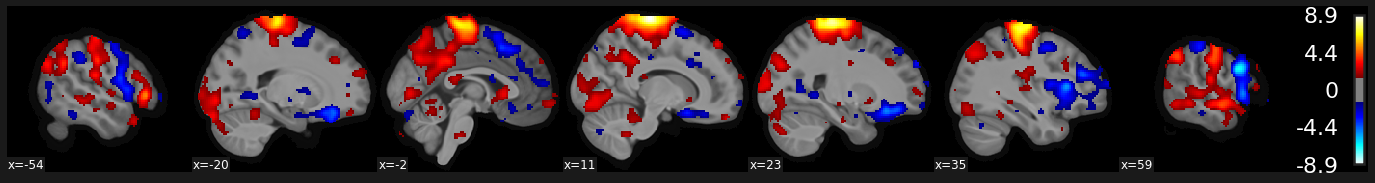

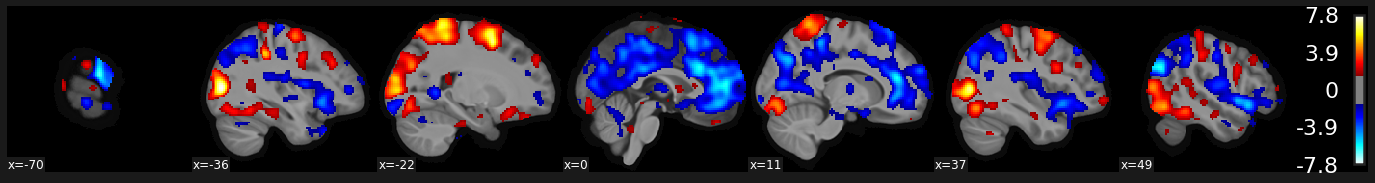

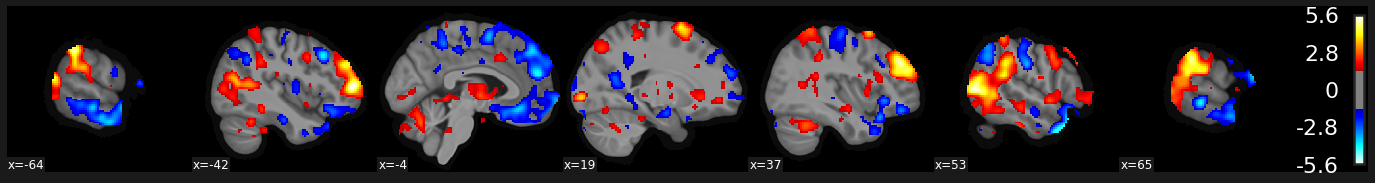

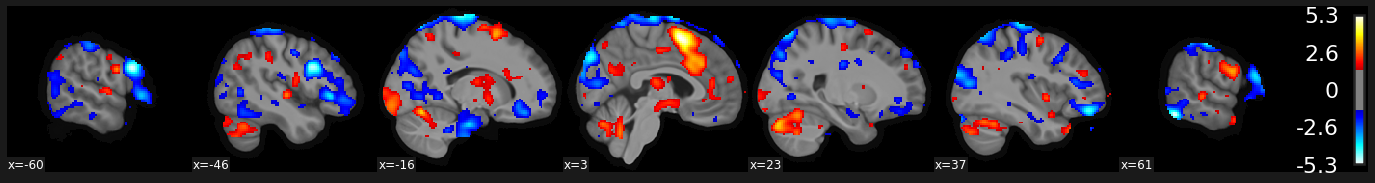

In [23]:
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink_sv_glm', '1stLevel', '_subject_id_2599','spmT_0010.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink_sv_glm', '1stLevel', '_subject_id_2599','spmT_0011.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink_sv_glm', '1stLevel', '_subject_id_2599','spmT_0012.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(os.path.join(out_root, 'imaging', 'Sink_sv_glm', '1stLevel', '_subject_id_2599','spmT_0013.nii'), threshold = 1.5, bg_img = anat_mean, display_mode = 'x')

## Look at SPM level 2 analysis

In [9]:
# Med > Mon, all
# con_2nd = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/con_0001.nii')
con_2nd = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001_thr.nii')


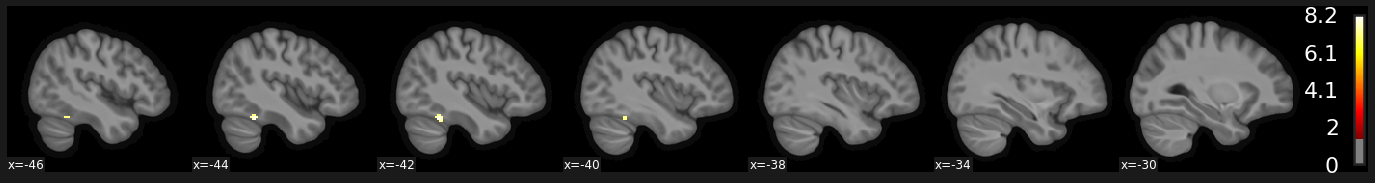

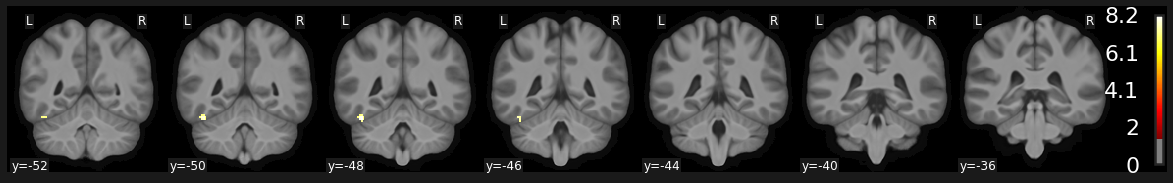

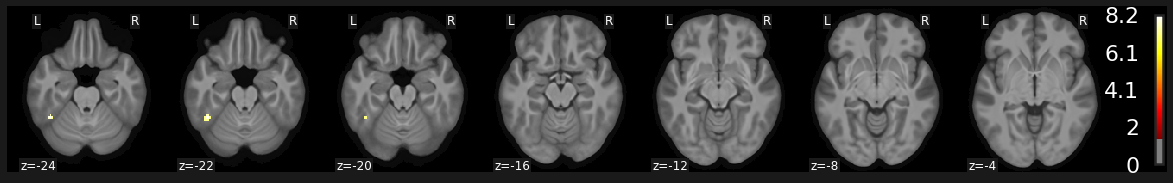

In [10]:
thr = 1.5
plotting.plot_stat_map(con_2nd, threshold = thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(con_2nd, threshold = thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(con_2nd, threshold = thr, bg_img = anat_mean, display_mode = 'z')

# plotting.plot_stat_map(con_2nd, display_mode = 'x')
# plotting.plot_stat_map(con_2nd, bg_img = anat_mean, display_mode = 'y')
# plotting.plot_stat_map(con_2nd, bg_img = anat_mean, display_mode = 'z')

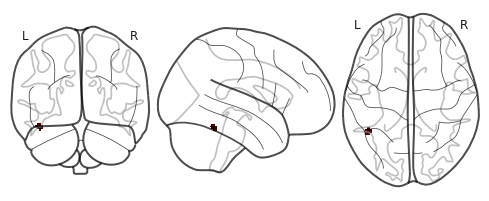

In [11]:
plotting.plot_glass_brain(con_2nd, threshold = thr)

In [20]:
# spmt2nd_thr = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001_thr.nii')
spmt2nd_thr = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_sv_glm/2ndLevel_cluster/_contrast_id_con_0013/spmT_0001_thr.nii')


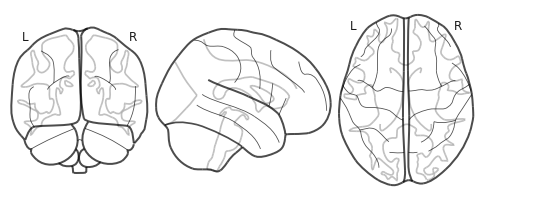

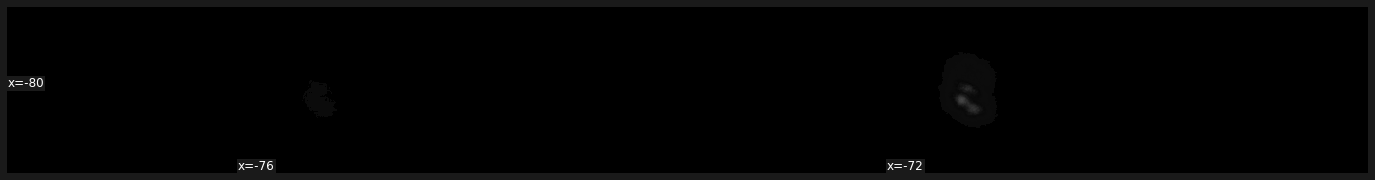

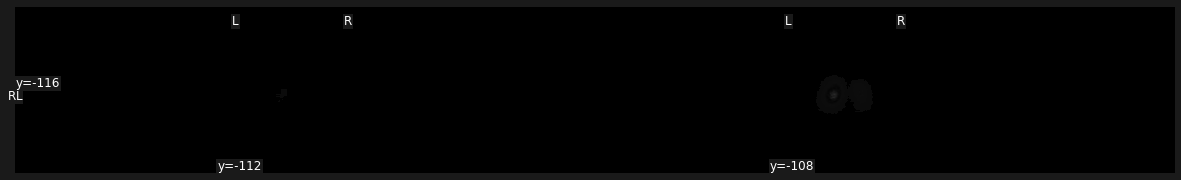

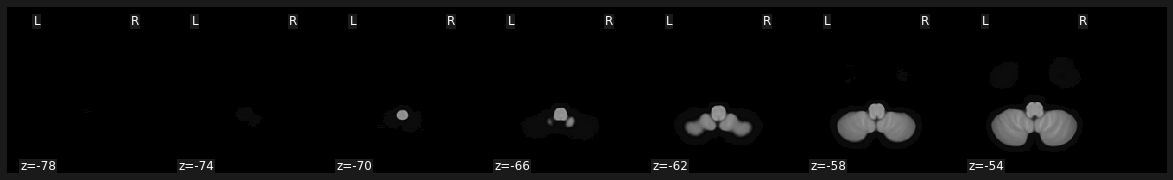

In [19]:
plotting.plot_glass_brain(spmt2nd_thr,colorbar = 1, black_bg = 0)
plotting.plot_stat_map(spmt2nd_thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(spmt2nd_thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(spmt2nd_thr, bg_img = anat_mean, display_mode = 'z')


In [24]:
# spmt2nd = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii')
spmt2nd = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_sv_glm/2ndLevel_cluster/_contrast_id_con_0011/spmT_0001.nii')

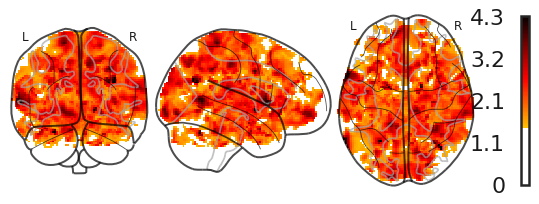

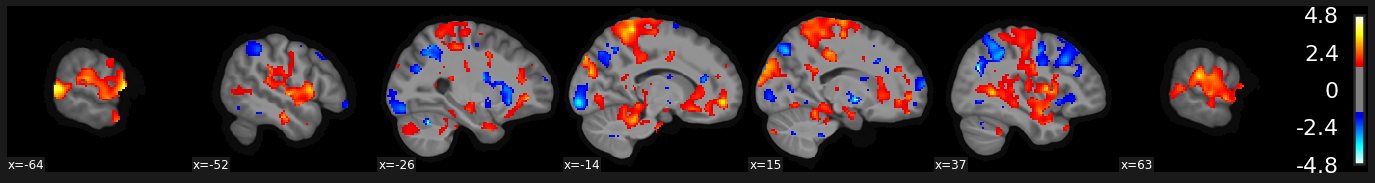

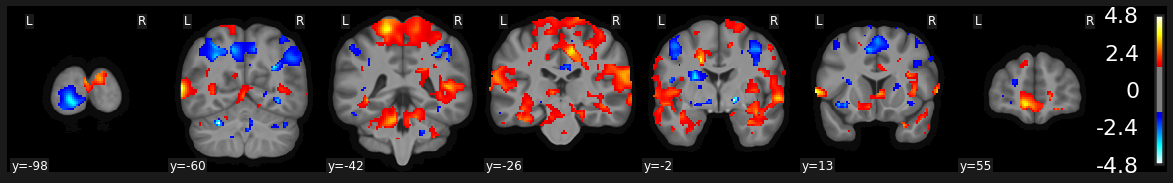

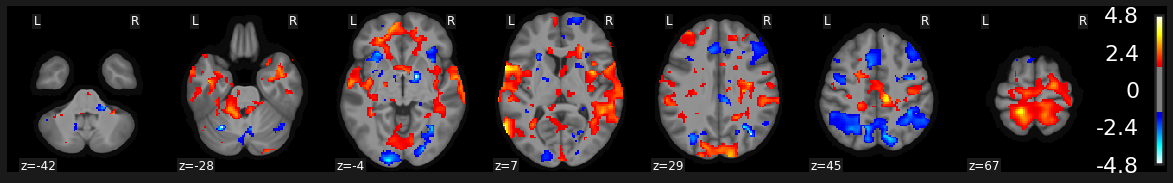

In [25]:
thr = 1.5
plotting.plot_glass_brain(spmt2nd,threshold = thr, colorbar = 1, black_bg = 0)
plotting.plot_stat_map(spmt2nd, threshold = thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(spmt2nd, threshold = thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(spmt2nd, threshold = thr, bg_img = anat_mean, display_mode = 'z')

### FDR correction

In [74]:
# tmap = nib.load('/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii')

tmap_thr_model = spm.Threshold(spm_mat_file = '/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_sv_glm/2ndLevel_cluster/_contrast_id_con_0010/SPM.mat', 
                         stat_image = '/home/rj299/scratch60/mdm_analysis/output/imaging/Sink_sv_glm/2ndLevel_cluster/_contrast_id_con_0010/spmT_0001.nii',
                         contrast_index = 1,
#                          use_topo_fdr=True,
                         use_fwe_correction=False, # here we can use fwe or fdr
#                          extent_threshold=10,
                         height_threshold= 0.005,
#                          extent_fdr_p_threshold = 0.05,
                         height_threshold_type='p-value')

tmap_thr_model.run()
# tmap_thr, n_clusters, pre_topo_fdr_map, pre_topo_n_clusters, activation_forced, cluster_forming_thr = tmap_thr_model.run()

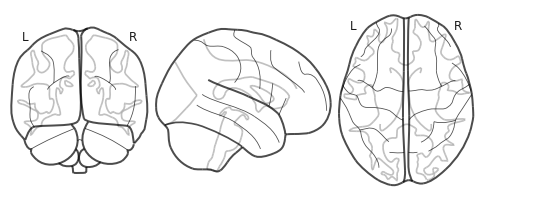

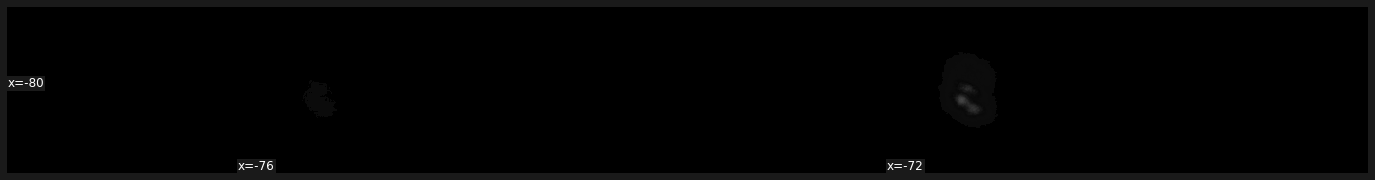

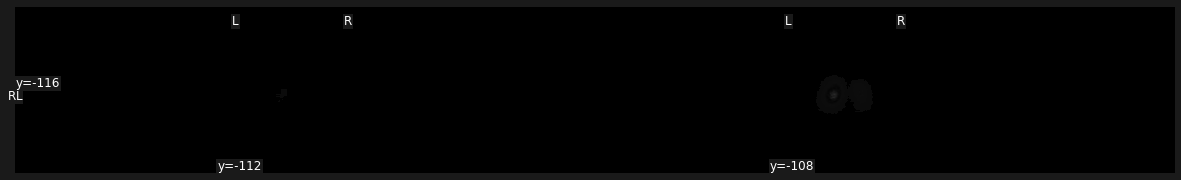

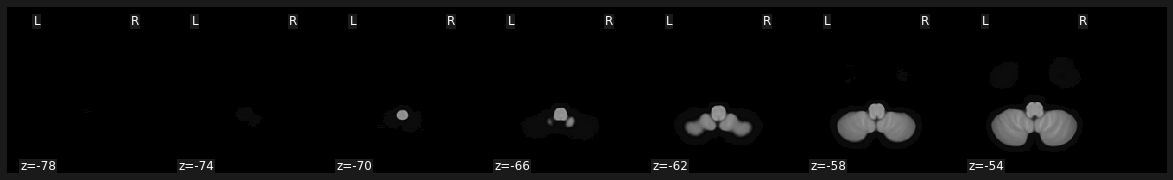

In [75]:
tmap_thr = nib.load('spmT_0001_thr.nii')
# tmap_thr = nib.load('spmT_0001_pre_topo_thr.nii')

plotting.plot_glass_brain(tmap_thr,colorbar = 1, black_bg = 0)
plotting.plot_stat_map(tmap_thr, bg_img = anat_mean, display_mode = 'x')
plotting.plot_stat_map(tmap_thr, bg_img = anat_mean, display_mode = 'y')
plotting.plot_stat_map(tmap_thr, bg_img = anat_mean, display_mode = 'z')

### Using TFCE to conduct Cluster-based thresholding (FSL)

In [55]:
# create mean brain mask for all sub

wb_mask_all = glob.glob('/home/rj299/scratch60/mdm_analysis/data_rename/sub-*/ses-1/func/sub-*_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
# wb_mask_all

In [56]:
len(wb_mask_all)

35

In [57]:
# exclude subjects
for wb_mask in wb_mask_all:
    sub_id = int(wb_mask.split('/sub-')[1].split('/ses-')[0])
    
    if sub_id not in sub_num:
        wb_mask_all.remove(wb_mask)
        print(sub_id)

2062
2586


In [58]:
len(wb_mask_all)

33

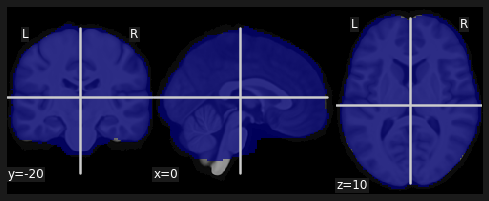

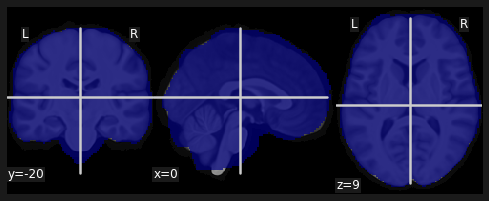

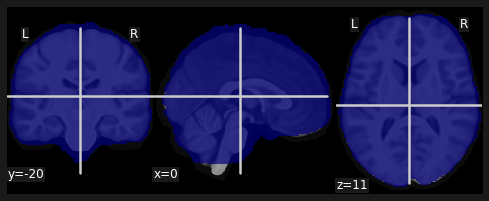

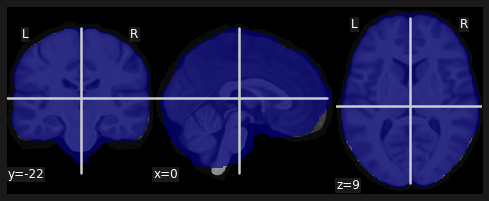

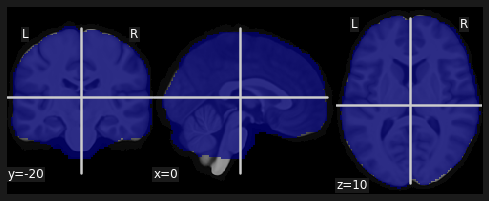

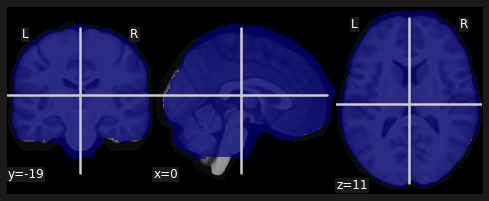

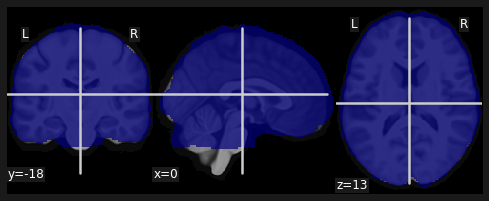

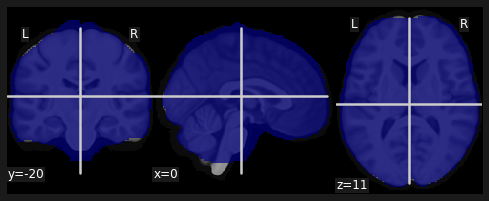

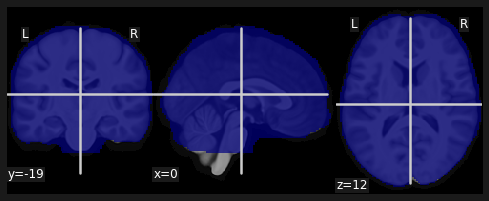

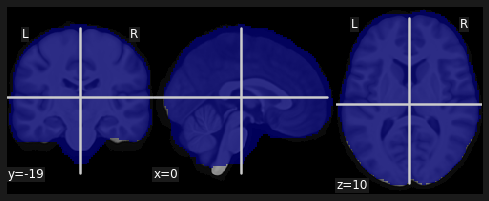

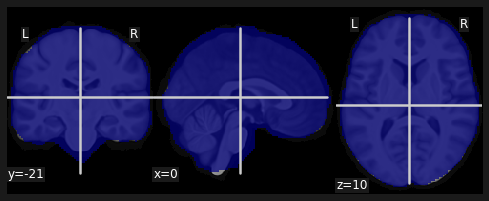

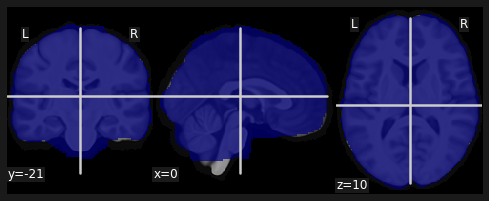

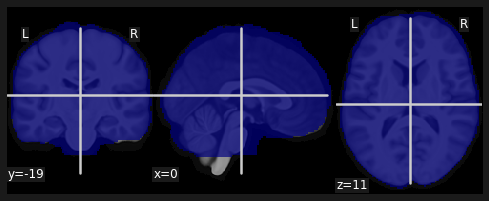

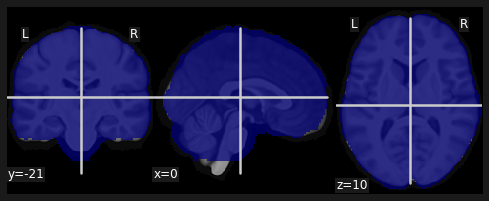

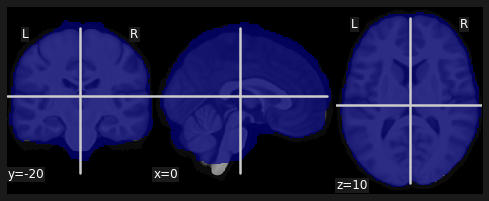

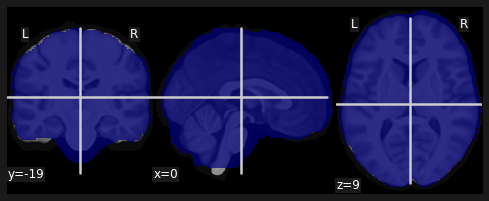

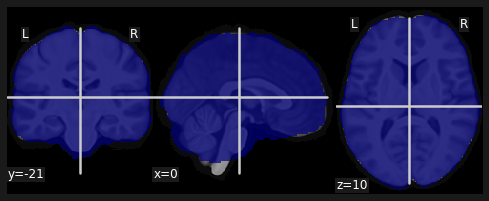

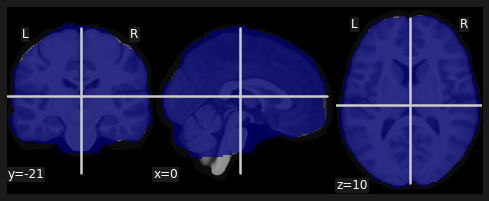

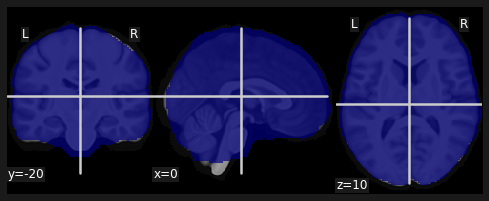

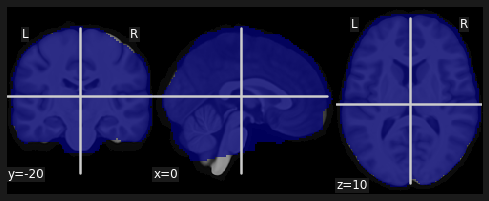

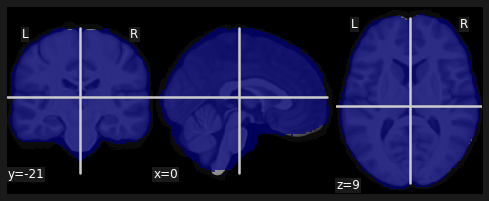

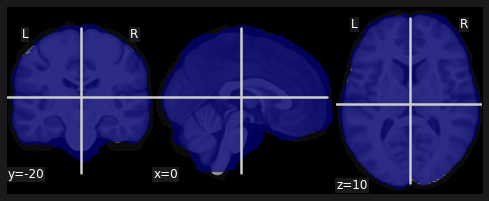

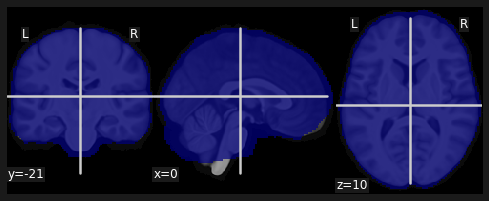

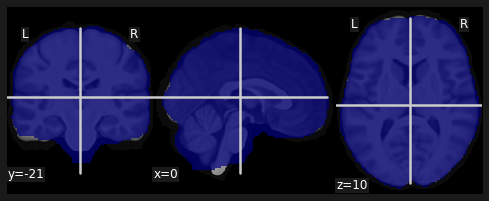

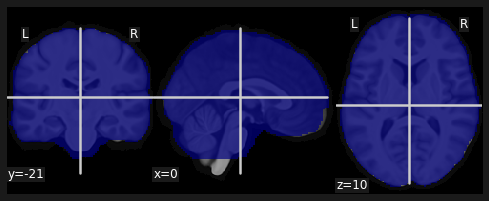

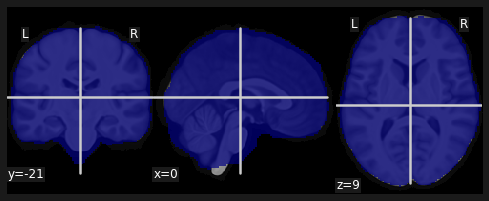

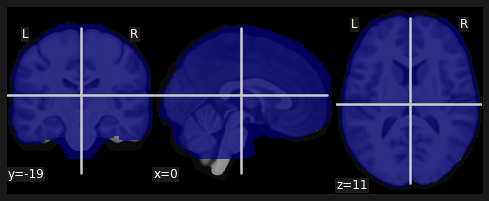

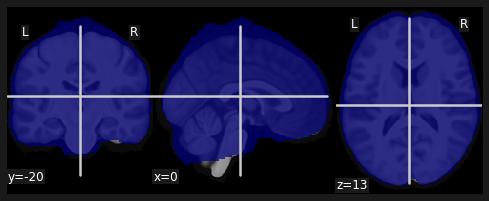

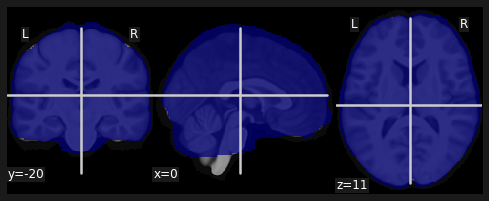

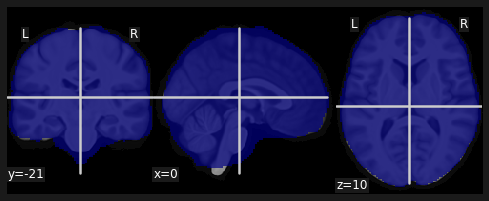

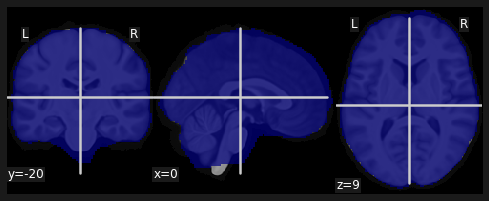

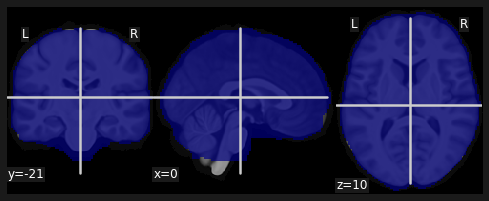

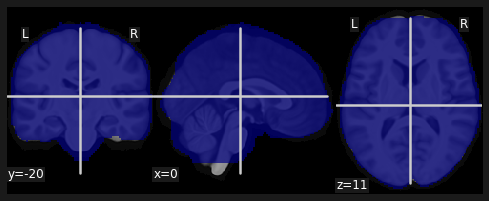

In [60]:
# print mask
for wb_mask in wb_mask_all:
    plotting.plot_roi(wb_mask, bg_img = anat_mean)

In [62]:
# mean mask
wb_mask_mean = mean_img(wb_mask_all)

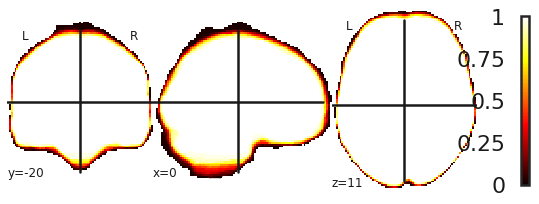

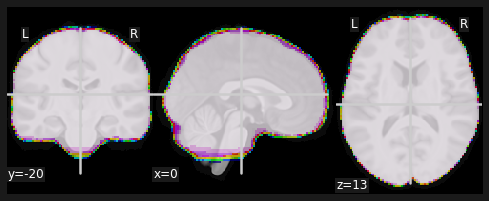

In [65]:
plotting.plot_stat_map(wb_mask_mean)
plotting.plot_roi(wb_mask_mean, bg_img = anat_mean)

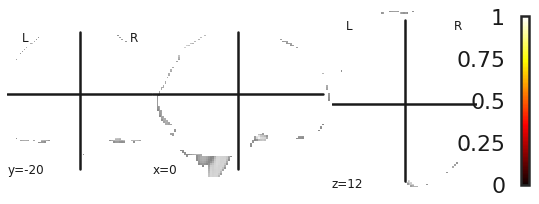

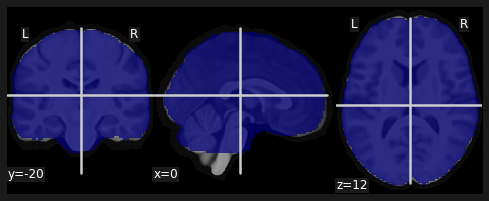

In [64]:
from nilearn.image import math_img

wb_mask_group = math_img("a>=0.95", a = wb_mask_mean)
plotting.plot_stat_map(wb_mask_group)
plotting.plot_roi(wb_mask_group, bg_img = anat_mean)

In [66]:
# save the group whole brain mask
# wb_mask_group.to_filename(os.path.join(out_root, 'imaging', wb_mask_group.nii.gz'))

In [24]:
cluster_thr = fsl.Randomise(in_file = '/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0001/spmT_0001.nii',
                            mask = '/home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
                            base_name = os.path.join(out_root, 'imaging', 'map_correction'),
#                             design_mat = '/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/SPM.mat',
                            one_sample_group_mean = True,
                            tfce = True,
                            vox_p_values = True,
                            num_perm = 200)
cluster_thr.run()

191119-10:58:01,435 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI
191119-10:58:01,786 nipype.interface INFO:
	 stdout 2019-11-19T10:58:01.786542:randomise options: -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0001/spmT_0001.nii -o /home/rj299/scratch60/mdm_analysis/output/imaging/map_correction -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -1 -T -x 
191119-10:58:01,876 nipype.interface INFO:
	 stdout 2019-11-19T10:58:01.876888:Loading Data: 
191119-10:58:01,877 nipype.interface INFO:
	 stdout 2019-11-19T10:58:01.876888:Data loaded
191119-10:58:02,167 nipype.interface INFO:
	 stdout 2019-11-19T10:58:02.167325:One-sample design detected; sign-flipping instead of permuting.
191119-10:58:02,168 nipype.interface INFO:
	 stdout 2019-11-19T10:58:02.167325:2 sign-flips required for exhaustive test o

RuntimeError: Command:
randomise -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0001/spmT_0001.nii -o "/home/rj299/scratch60/mdm_analysis/output/imaging/map_correction" -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -1 -T -x
Standard output:
randomise options: -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0001/spmT_0001.nii -o /home/rj299/scratch60/mdm_analysis/output/imaging/map_correction -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -1 -T -x 
Loading Data: 
Data loaded
One-sample design detected; sign-flipping instead of permuting.
2 sign-flips required for exhaustive test of t-test 1
Doing all 2 unique permutations
Starting permutation 1 (Unpermuted data)
Warning: The unpermuted statistic image for the current image contains no positive values, and cannot be processed with TFCE. A blank output image will be created.
Starting permutation 2

error: sort(): given object has non-finite elements

Standard error:
ERROR: Program failed, unknown exception

Exiting
Return code: 1

In [31]:
randomize = pe.Node(interface = fsl.Randomise(), base_dir = os.path.join(out_root, 'imaging', 'map_correction'),
                   name = 'fsl_randomize')

randomize.inputs.in_file = '/home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii'
randomize.inputs.mask = '/home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
randomize.inputs.one_sample_group_mean = False
randomize.inputs.tfce = True
randomize.inputs.vox_p_values = True
randomize.inputs.num_perm = 200

randomize.run()

191115-14:15:50,960 nipype.interface WARNING:
	 FSLOUTPUTTYPE environment variable is not set. Setting FSLOUTPUTTYPE=NIFTI
191115-14:15:50,967 nipype.workflow INFO:
	 [Node] Setting-up "fsl_randomize" in "/gpfs/ysm/scratch60/levy_ifat/rj299/mdm_analysis/output/imaging/map_correction/fsl_randomize".
191115-14:15:50,976 nipype.workflow INFO:
	 [Node] Running "fsl_randomize" ("nipype.interfaces.fsl.model.Randomise"), a CommandLine Interface with command:
randomise -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii -o "randomise" -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -T -x
191115-14:15:51,58 nipype.interface INFO:
	 stdout 2019-11-15T14:15:51.058779:randomise options: -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii -o randomise -m /home/rj299/scratch60/mdm_analysis/data_rename

RuntimeError: Command:
randomise -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii -o "randomise" -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -T -x
Standard output:
randomise options: -i /home/rj299/scratch60/mdm_analysis/output/imaging/Sink/2ndLevel/_contrast_id_con_0009/spmT_0001.nii -o randomise -m /home/rj299/scratch60/mdm_analysis/data_rename/sub-2073/ses-1/func/sub-2073_ses-1_task-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz -n 200 -T -x 
Loading Data: 
Standard error:
ERROR: Program failedRandomise requires a design matrix and contrast as input

Exiting
Return code: 1